In [2201]:
from sklearn import model_selection, linear_model, metrics
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2202]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Загрузка исходных данных

Тренировочные данные

In [2203]:
train_data = pd.read_csv('train_titanic.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Тестовые данные

In [2204]:
test_data = pd.read_csv('test_titanic.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Описание признаков

1.  PassangerId - идентификационный номер пассажира или члена экипажа
2.  Pclass      - класс каюты (значения: 1, 2, 3)
3.  Name        - имя пассажира или члена экипажа
4.  Sex         - пол (значения: male, female)
5.  Age         - возраст пассажира или члена экипажа
6.  SibSp       - родственные отношения (брат, сестра, сводный брат, сводная сестра)
7.  Parch       - родственные отношения (мать, отец, дочь, сын, приёмная дочь, приёмный сын), 0 - ребёнок с няней
8.  Ticket      - номер билета
9.  Fare        - стоимость билета
10. Cabin       - номер каюты
11. Embarked    - пункт отправления пассажира (значения: C-Cherbourg, Q-Queenstown, S-Southampton)

# Анализ пропущенных данных

Объединим тестовые и тренировочные данные

In [2205]:
all_data = pd.concat([train_data, test_data], ignore_index=True)

In [2206]:
# Размеры данных
print('Размер тренировочных данных:\t', train_data.shape, '\n')
print('Размер тестовых данных:\t\t', test_data.shape, '\n')
print('Размер объединенных данных:\t', all_data.shape, '\n')

Размер тренировочных данных:	 (891, 12) 

Размер тестовых данных:		 (418, 11) 

Размер объединенных данных:	 (1309, 12) 



In [2207]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [2208]:
print('Количество пропущенных данных:')
all_data.isnull().sum()

Количество пропущенных данных:


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

# Исследование зависимости выживаемости от возраста

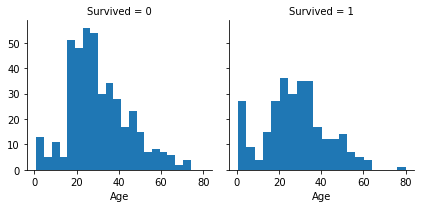

In [2209]:
g = sns.FacetGrid(train_data, col='Survived')
g.map(plt.hist, 'Age', bins=20)
#age_surve.head()

# Исследование зависимости класса каюты от возраста

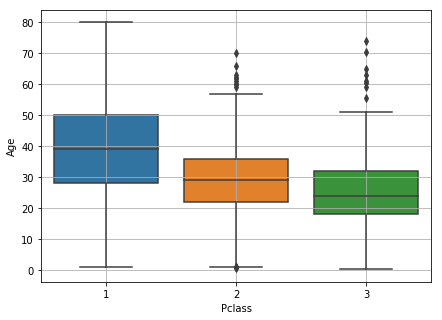

In [2210]:
plt.figure(figsize=(7, 5))
sns.boxplot(x=all_data['Pclass'], y=all_data['Age'])
plt.grid()

# Расчитаем средний возраст пассажиров для каждого из классов

In [2211]:
age_by_pclass_sex = all_data.groupby(['Sex', 'Pclass']).median()

In [2212]:
age_by_pclass_sex['Age']

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

# Заменим пропущенные значения возраста медианным по классу

In [2213]:
all_data['Age'] = all_data.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

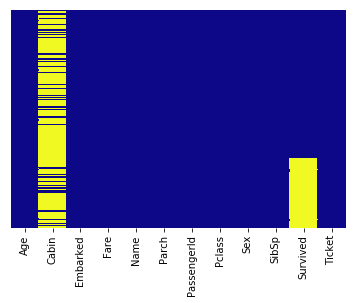

In [2214]:
sns.heatmap(all_data.isna(),yticklabels=False,cbar=False, cmap='plasma')

In [2215]:
all_data['AgeBand'] = pd.cut(all_data['Age'], 5)
all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.0902, 16.136]",0.550000
1,"(16.136, 32.102]",0.336714
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


# Разделим пассажиров на возрастные категории

In [2216]:
all_data.loc[all_data['Age'] < 16, 'Age'] = 0
all_data.loc[(all_data['Age'] >= 16) & (all_data['Age'] < 32), 'Age'] = 1
all_data.loc[(all_data['Age'] >= 32) & (all_data['Age'] < 48), 'Age'] = 2
all_data.loc[(all_data['Age'] >= 48) & (all_data['Age'] < 64), 'Age'] = 3
all_data.loc[all_data['Age'] >= 64, 'Age'] = 4

In [2217]:
all_data['Age'] = all_data['Age'].astype('int')
print(all_data['Age'][:5])

0    1
1    2
2    1
3    2
4    2
Name: Age, dtype: int32


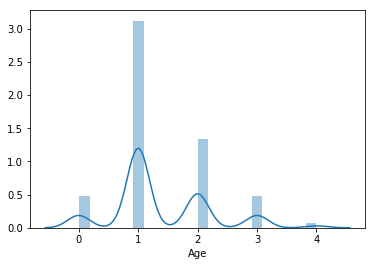

In [2218]:
sns.distplot(all_data['Age'])

# Удалим признак Cabin - пропущено 90%

In [2219]:
all_data.drop(labels='Cabin', axis=1, inplace=True)

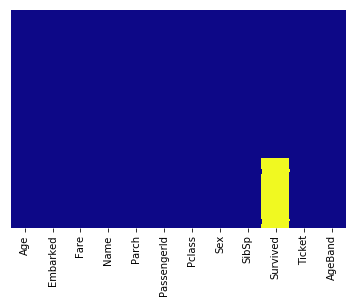

In [2220]:
sns.heatmap(all_data.isna(), yticklabels=False, cbar=False, cmap='plasma')

In [2221]:
print('Количество пропущенных данных:')
all_data.isnull().sum()

Количество пропущенных данных:


Age              0
Embarked         2
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
AgeBand          0
dtype: int64

# Замена пропущенных признаков Embarked на самый популярный

In [2222]:
from statistics import mode
#Проверим самый частый элемент
most_freq_in_Embarked = mode(all_data['Embarked'])
print(most_freq_in_Embarked)

S


In [2223]:
all_data['Embarked'] = all_data['Embarked'].fillna(most_freq_in_Embarked)
all_data.isnull().sum()

Age              0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
AgeBand          0
dtype: int64

In [2224]:
np.nonzero(all_data['Fare']==0)[0]
all_data['Fare'][179]

0.0

# Анализ зависимости выживаемости от класса каюты Pclass

In [2225]:
all_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Сделаем дополнительный признак Age*Pclass

In [2226]:
all_data['Age_x_Pclass'] = all_data['Age'] * all_data['Pclass']

# Анализ стоимости билета (Fare)

In [2227]:
fare_pclass = all_data.groupby(['Pclass']).median()['Fare']

In [2228]:
fare_pclass

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

# Замена пропущенного значения Fare медианным

In [2229]:
all_data['Fare'] = all_data.groupby(['Pclass'])['Fare'].apply(lambda x: x.fillna(x.median()))

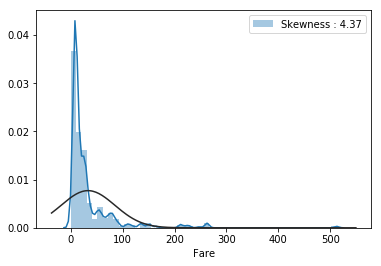

In [2230]:
from scipy import stats
from scipy.stats import norm

g = sns.distplot(all_data['Fare'], fit=norm, label="Skewness : %.2f"%(all_data["Fare"].skew()))
g = g.legend()

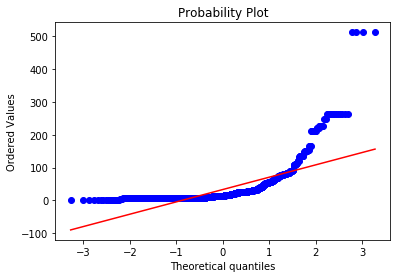

In [2231]:
res = stats.probplot(all_data['Fare'], plot=plt)

# Сделаем логарифмическое преобразование признака Fare

In [2232]:
#all_data['Fare'] = np.floor(np.log1p(all_data['Fare']))
all_data['Fare'] = np.log1p(all_data['Fare'])

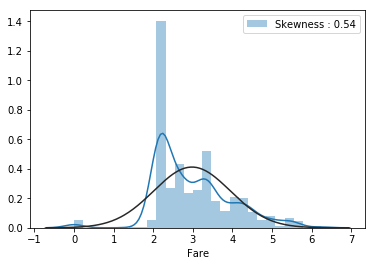

In [2233]:
g = sns.distplot(all_data['Fare'], fit=norm, label="Skewness : %.2f"%(all_data["Fare"].skew()))
g = g.legend()

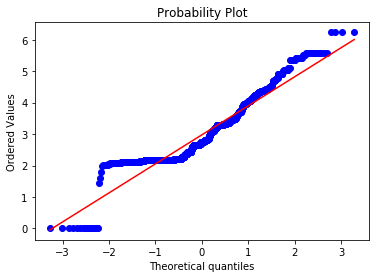

In [2234]:
res = stats.probplot(all_data['Fare'], plot=plt)

In [2235]:
# all_data['AgeBand'] = pd.cut(all_data['Age'], 5)
# all_data[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
bins=4
all_data['FareBand'] = pd.cut(all_data['Fare'], bins)
all_data[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.00624, 1.56]",0.066667
1,"(1.56, 3.12]",0.285164
2,"(3.12, 4.681]",0.506536
3,"(4.681, 6.241]",0.745098


In [2236]:
all_data.loc[all_data['Fare'] < 1.56, 'Fare'] = 0
all_data.loc[(all_data['Fare'] >= 1.56) & (all_data['Fare'] < 3.12), 'Fare'] = 1
all_data.loc[(all_data['Fare'] >= 3.12) & (all_data['Fare'] < 4.68), 'Fare'] = 2
all_data.loc[all_data['Fare'] >= 4.68, 'Fare'] = 3

In [2237]:
all_data[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean().sort_values(by='Fare', ascending=True)

,Fare,Survived
0,0.0,0.066667
1,1.0,0.285164
2,2.0,0.506536
3,3.0,0.745098


In [2238]:
uniq_el_in_fare = len(np.unique(all_data['Fare']))
print('уникальных элементов в Fare:', uniq_el_in_fare)

уникальных элементов в Fare: 4


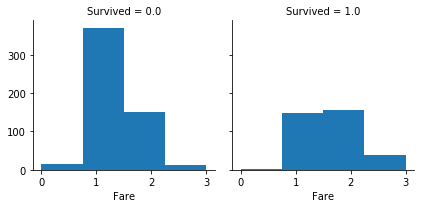

In [2239]:
g = sns.FacetGrid(data = all_data, col='Survived')
g.map(plt.hist, 'Fare', bins=uniq_el_in_fare)

# Анализ признака Embarked

In [2240]:
uniq_of_embarked = np.unique(all_data['Embarked'])
print('уникальных элементов в Embarked:', len(uniq_of_embarked))

уникальных элементов в Embarked: 3


In [2241]:
from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder() 
lbl.fit(list(all_data['Embarked'].values)) 
all_data['Embarked'] = lbl.transform(list(all_data['Embarked'].values))

In [2242]:
all_data['Embarked'][:10]

0    2
1    0
2    2
3    2
4    2
5    1
6    2
7    2
8    2
9    0
Name: Embarked, dtype: int64

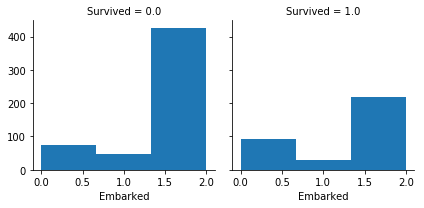

In [2243]:
g = sns.FacetGrid(data=all_data, col='Survived')
g.map(plt.hist, 'Embarked', bins=len(uniq_of_embarked))

# Кодирование категориальных признаков Sex

Кодирование категориального признака Sex

In [2244]:
lbl.fit(list(all_data['Sex'].values)) 
all_data['Sex'] = lbl.transform(list(all_data['Sex'].values))

Кодирование категориального признака Embarked

In [2245]:
all_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeBand,Age_x_Pclass,FareBand
0,1,2,1.0,"Braund, Mr. Owen Harris",0,1,3,1,1,0.0,A/5 21171,"(16.136, 32.102]",3,"(1.56, 3.12]"
1,2,0,2.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,1,1.0,PC 17599,"(32.102, 48.068]",2,"(3.12, 4.681]"
2,1,2,1.0,"Heikkinen, Miss. Laina",0,3,3,0,0,1.0,STON/O2. 3101282,"(16.136, 32.102]",3,"(1.56, 3.12]"
3,2,2,2.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,0,1,1.0,113803,"(32.102, 48.068]",2,"(3.12, 4.681]"
4,2,2,1.0,"Allen, Mr. William Henry",0,5,3,1,0,0.0,373450,"(32.102, 48.068]",6,"(1.56, 3.12]"


# Анализ признака Name

In [2246]:
all_data['Name'] = all_data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [2247]:
np.unique(all_data['Name'])

array(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer', 'Lady',
       'Major', 'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev',
       'Sir'], dtype=object)

In [2248]:
pd.crosstab(all_data['Name'], all_data['Sex'])

Sex,0,1
Name,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [2249]:
other_titles = list(['Capt', 'Col', 'Countess', 'Don', 'Dona', 'Dr', 'Jonkheer','Lady',
                     'Major', 'Mlle', 'Mme', 'Ms', 'Rev', 'Sir'])

In [2250]:
all_data['Name'] = all_data['Name'].replace(other_titles, 'Other')

In [2251]:
np.unique(all_data['Name'])

array(['Master', 'Miss', 'Mr', 'Mrs', 'Other'], dtype=object)

In [2252]:
all_data[['Name', 'Survived']].groupby(['Name'], as_index=False).mean()

,Name,Survived
0,Master,0.575000
1,Miss,0.697802
2,Mr,0.156673
3,Mrs,0.792000
4,Other,0.444444


Закодируем признак Name

In [2253]:
lbl.fit(list(all_data['Name'].values)) 
all_data['Name'] = lbl.transform(list(all_data['Name'].values))

In [2254]:
uniq_of_name = np.unique(all_data['Name'])
print('уникальные имена:', uniq_of_name, 'количество уникальных:', len(uniq_of_name))

уникальные имена: [0 1 2 3 4] количество уникальных: 5


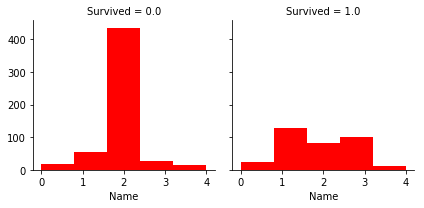

In [2255]:
g = sns.FacetGrid(data=all_data, col='Survived')
g.map(plt.hist, 'Name', color='r', bins=len(uniq_of_name))

In [2256]:
all_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeBand,Age_x_Pclass,FareBand
0,1,2,1.0,2,0,1,3,1,1,0.0,A/5 21171,"(16.136, 32.102]",3,"(1.56, 3.12]"
1,2,0,2.0,3,0,2,1,0,1,1.0,PC 17599,"(32.102, 48.068]",2,"(3.12, 4.681]"
2,1,2,1.0,1,0,3,3,0,0,1.0,STON/O2. 3101282,"(16.136, 32.102]",3,"(1.56, 3.12]"
3,2,2,2.0,3,0,4,1,0,1,1.0,113803,"(32.102, 48.068]",2,"(3.12, 4.681]"
4,2,2,1.0,2,0,5,3,1,0,0.0,373450,"(32.102, 48.068]",6,"(1.56, 3.12]"


# Анализ признака Parch (родители)

In [2257]:
uniq_of_parch = np.unique(train_data['Parch'])
print('уникальных Parch:', uniq_of_parch)

уникальных Parch: [0 1 2 3 4 5 6]


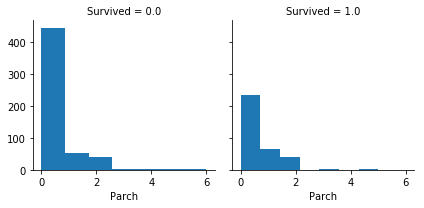

In [2258]:
g = sns.FacetGrid(data=all_data, col='Survived')
g.map(plt.hist, 'Parch', bins=len(uniq_of_parch))

# Анализ признака SibSp (братья, сёстры)

In [2259]:
uniq_of_sibsp = np.unique(all_data['SibSp'])
print('уникальных SibSp:', uniq_of_sibsp)
print('количество категорий:', len(uniq_of_sibsp))

уникальных SibSp: [0 1 2 3 4 5 8]
количество категорий: 7


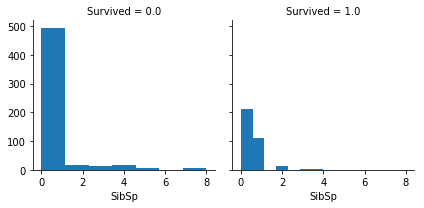

In [2260]:
g = sns.FacetGrid(data=all_data, col='Survived')
g.map(plt.hist, 'SibSp', bins=len(uniq_of_sibsp))

# Анализ суммарного распределения Parch + SibSp

In [2261]:
all_data['Parch_SibSp'] = all_data['Parch'] + all_data['SibSp']

In [2262]:
all_data.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,AgeBand,Age_x_Pclass,FareBand,Parch_SibSp
0,1,2,1.0,2,0,1,3,1,1,0.0,A/5 21171,"(16.136, 32.102]",3,"(1.56, 3.12]",1
1,2,0,2.0,3,0,2,1,0,1,1.0,PC 17599,"(32.102, 48.068]",2,"(3.12, 4.681]",1
2,1,2,1.0,1,0,3,3,0,0,1.0,STON/O2. 3101282,"(16.136, 32.102]",3,"(1.56, 3.12]",0
3,2,2,2.0,3,0,4,1,0,1,1.0,113803,"(32.102, 48.068]",2,"(3.12, 4.681]",1
4,2,2,1.0,2,0,5,3,1,0,0.0,373450,"(32.102, 48.068]",6,"(1.56, 3.12]",0


In [2263]:
uniq_of_pasib = np.unique(all_data['Parch_SibSp'])
print('уникальных Parch_SibSp:', uniq_of_pasib)
print('количество категорий:', len(uniq_of_pasib))

уникальных Parch_SibSp: [ 0  1  2  3  4  5  6  7 10]
количество категорий: 9


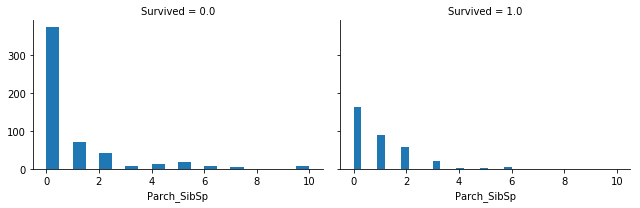

In [2264]:
g = sns.FacetGrid(data=all_data, col='Survived', height=3, aspect=1.5)
g.map(plt.hist, 'Parch_SibSp', bins=20)

In [2265]:
parch_0 = all_data[all_data.Parch_SibSp == 0]["Survived"]==True
rate = sum(parch_0)/len(parch_0)
print('одинокие пассажиры, которые спаслись: {:.4f}% (количество {})\n'.format(rate*100, sum(parch_0)))

parch_0 = all_data[all_data.Parch_SibSp == 0]["Survived"]==False
rate = sum(parch_0)/len(parch_0)
print('одинокие пассажиры, которые НЕ спаслись: {:.4f}% (количество {})\n'.format(rate*100, sum(parch_0)))

parch_1 = all_data[all_data.Parch_SibSp == 1]["Survived"]==True
rate = sum(parch_1)/len(parch_1)
print('пассажиры с одним родственником, которые спаслись: {:.4f}% (количество {})\n'.format(rate*100, sum(parch_1)))

parch_1 = all_data[all_data.Parch_SibSp == 1]["Survived"]==False
rate = sum(parch_1)/len(parch_1)
print('пассажиры с одним родственником, которые НЕ спаслись: {:.4f}% (количество {})\n'.format(rate*100, sum(parch_1)))

одинокие пассажиры, которые спаслись: 20.6329% (количество 163)

одинокие пассажиры, которые НЕ спаслись: 47.3418% (количество 374)

пассажиры с одним родственником, которые спаслись: 37.8723% (количество 89)

пассажиры с одним родственником, которые НЕ спаслись: 30.6383% (количество 72)



# Удалим столбцы Parch и SibSp

In [2266]:
all_data.drop(['Parch', 'SibSp'], axis='columns', inplace=True)

In [2267]:
all_data.head()

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,AgeBand,Age_x_Pclass,FareBand,Parch_SibSp
0,1,2,1.0,2,1,3,1,0.0,A/5 21171,"(16.136, 32.102]",3,"(1.56, 3.12]",1
1,2,0,2.0,3,2,1,0,1.0,PC 17599,"(32.102, 48.068]",2,"(3.12, 4.681]",1
2,1,2,1.0,1,3,3,0,1.0,STON/O2. 3101282,"(16.136, 32.102]",3,"(1.56, 3.12]",0
3,2,2,2.0,3,4,1,0,1.0,113803,"(32.102, 48.068]",2,"(3.12, 4.681]",1
4,2,2,1.0,2,5,3,1,0.0,373450,"(32.102, 48.068]",6,"(1.56, 3.12]",0


# Сделаем замену если нет родственников - 0, если есть - 1

In [2268]:
all_data['Parch_SibSp'][all_data.Parch_SibSp > 0] = 1

In [2269]:
all_data.head()

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,Ticket,AgeBand,Age_x_Pclass,FareBand,Parch_SibSp
0,1,2,1.0,2,1,3,1,0.0,A/5 21171,"(16.136, 32.102]",3,"(1.56, 3.12]",1
1,2,0,2.0,3,2,1,0,1.0,PC 17599,"(32.102, 48.068]",2,"(3.12, 4.681]",1
2,1,2,1.0,1,3,3,0,1.0,STON/O2. 3101282,"(16.136, 32.102]",3,"(1.56, 3.12]",0
3,2,2,2.0,3,4,1,0,1.0,113803,"(32.102, 48.068]",2,"(3.12, 4.681]",1
4,2,2,1.0,2,5,3,1,0.0,373450,"(32.102, 48.068]",6,"(1.56, 3.12]",0


# Посмотрим зависимость Спасения от наличия родственников

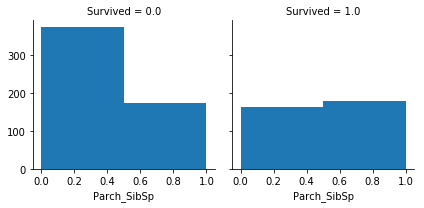

In [2270]:
g = sns.FacetGrid(data=all_data, col='Survived')
g.map(plt.hist, 'Parch_SibSp', bins=2)

# Удалим номер билета

In [2271]:
all_data.drop(['Ticket'], axis='columns', inplace=True)

# Сделаем фиксированные значения для Age и Fare

In [2272]:
all_data['Age'] = all_data['Age'].astype('int')
all_data['Fare'] = all_data['Fare'].astype('int')

In [2273]:
all_data.head()

,Age,Embarked,Fare,Name,PassengerId,Pclass,Sex,Survived,AgeBand,Age_x_Pclass,FareBand,Parch_SibSp
0,1,2,1,2,1,3,1,0.0,"(16.136, 32.102]",3,"(1.56, 3.12]",1
1,2,0,2,3,2,1,0,1.0,"(32.102, 48.068]",2,"(3.12, 4.681]",1
2,1,2,1,1,3,3,0,1.0,"(16.136, 32.102]",3,"(1.56, 3.12]",0
3,2,2,2,3,4,1,0,1.0,"(32.102, 48.068]",2,"(3.12, 4.681]",1
4,2,2,1,2,5,3,1,0.0,"(32.102, 48.068]",6,"(1.56, 3.12]",0


# Выбор предсказательной модели

In [2274]:
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [2275]:
# features for train and prediction

#features = ['Sex', 'Age_x_Pclass', 'Parch_SibSp', 'Fare', 'Name', 'Embarked']
#features = ['Age', 'Embarked', 'Fare', 'Name', 'Pclass', 'Sex', 'Parch_SibSp', 'Age_x_Pclass']
features = ['Age', 'Embarked', 'Fare', 'Name', 'Pclass', 'Sex', 'Parch_SibSp']
#features = ['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Parch_SibSp']
#features = train_data.columns

In [2276]:
test_data = all_data[features][train_data.shape[0]:]
print('размер тестовых данных:', test_data.shape)

размер тестовых данных: (418, 7)


In [2277]:
test_data.head()

,Age,Embarked,Fare,Name,Pclass,Sex,Parch_SibSp
891,2,1,1,2,3,1,0
892,2,2,1,3,3,0,1
893,3,1,1,2,2,1,0
894,1,2,1,2,3,1,0
895,1,2,1,3,3,0,1


In [2278]:
passangerId = np.array(all_data['PassengerId'][train_data.shape[0]:])

In [2279]:
passangerId[:5]

array([892, 893, 894, 895, 896], dtype=int64)

In [2280]:
# целевая метка
target = all_data['Survived'][:train_data.shape[0]]
target.astype('int')
print('размер целевой метки:',target.shape)

размер целевой метки: (891,)


In [2281]:
# тренировочные данные
train_data = all_data[features][:train_data.shape[0]]
#train_data.drop(['Survived', 'PassengerId'], axis='columns', inplace=True)

print('размер тренировочных данных:', train_data.shape)

размер тренировочных данных: (891, 7)


In [2282]:
train_data.head(10)

,Age,Embarked,Fare,Name,Pclass,Sex,Parch_SibSp
0,1,2,1,2,3,1,1
1,2,0,2,3,1,0,1
2,1,2,1,1,3,0,0
3,2,2,2,3,1,0,1
4,2,2,1,2,3,1,0
5,1,1,1,2,3,1,0
6,3,2,2,2,1,1,0
7,0,2,1,0,3,1,1
8,1,2,1,3,3,0,1
9,0,0,2,3,2,0,1


In [2283]:
# Опрделение наилучшего результата предсказания разных моделей по кросс-валидации
#Validation function
n_folds = 5

def f1_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(train_data[features].values)
    f1_score = cross_val_score(model, train_data[features].values, target, scoring="f1", cv = kf)
    return(f1_score)

def accuracy(model):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(train_data[features].values)
    acc_score = cross_val_score(model, train_data[features].values, target, scoring="accuracy", cv = kf)
    return(acc_score)

# RidgeClassifier

In [2284]:
ridge_model = make_pipeline(RobustScaler(), RidgeClassifier())

In [2285]:
score = accuracy(ridge_model)
print("\nRidge accuracy score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Ridge accuracy score: 0.7901 (0.0146)



# RandomForestClassifier

In [2286]:
rndF_model = RandomForestClassifier(n_estimators=50,
                                    max_depth=5,
                                    min_samples_leaf=3,
                                    min_samples_split=0.01,
                                    n_jobs=-1)

# Поиск оптимальных параметров модели

In [2287]:
# rndF_model.get_params().keys()

In [2288]:
# np.linspace(0.01, 0.1, num = 10)

In [2289]:
# param_grid = {
# #    'n_estimators' : [10, 5, 25, 50, 100],
#     'max_depth' : np.arange(1, 19, 1),
#     'min_samples_leaf' : np.arange(1, 20, 1),
#     'min_samples_split' : np.linspace(0.01, 0.2, num = 10)
# }

In [2290]:
# cv = model_selection.StratifiedShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)

In [2291]:
# grid_cv = model_selection.GridSearchCV(rndF_model, param_grid, scoring = 'accuracy', cv = cv, n_jobs=-1)

In [2292]:
# %%time
# grid_cv.fit(train_data[features], target)

In [2293]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [2294]:
# score = accuracy(grid_cv.best_estimator_)
score = accuracy(rndF_model)
print("\nRandomForest classifire accuracy score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


RandomForest classifire accuracy score: 0.8205 (0.0201)



# XGB Classifier

In [2295]:
xgb_model = xgb.XGBClassifier(n_estimators=50,
                              max_depth=4,
                              min_child_weight=0.5,
                              learning_rate=0.1,
                              max_delta_step=2,
                              random_state=7,
                              n_jobs=-1)

# Поиск оптимальных параметров модели

In [2296]:
#xgb_model.get_params().keys()

In [2297]:
# param_grid = {
# #    'n_estimators' : [10, 5, 25, 50, 100],
#     'max_depth' : np.arange(1, 19, 1),
# #    'min_child_weight' : np.linspace(0.1, 1, num = 10)
# #    'learning_rate' : np.linspace(0.05, 0.15, num = 10)
# #    'max_delta_step' : np.linspace(1, 10, num = 10)
# #    'min_samples_split' : np.linspace(0.01, 0.2, num = 10)
# }

In [2298]:
# cv = model_selection.StratifiedShuffleSplit(n_splits=5, test_size = 0.2, random_state = 0)

In [2299]:
# grid_cv = model_selection.GridSearchCV(xgb_model, param_grid, scoring = 'accuracy', cv = cv, n_jobs=-1)

In [2300]:
# %%time
# grid_cv.fit(train_data[features], target)

In [2301]:
# print(grid_cv.best_score_)
# print(grid_cv.best_params_)

In [2302]:
score = accuracy(xgb_model)
#score = accuracy(grid_cv.best_estimator_)
print("\nXGB classifire accuracy score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


XGB classifire accuracy score: 0.8238 (0.0251)



# Decision Tree Classifire

In [2303]:
dec_tree_model = DecisionTreeClassifier()

In [2304]:
score = accuracy(dec_tree_model)
print("\nDecisionTreeClassifier accuracy score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


DecisionTreeClassifier accuracy score: 0.7913 (0.0190)



# Тренировка модели XGB Classifier

In [2305]:
X = train_data
y = target

#xgb_model.fit(X, y)

In [2306]:
# y_pred = xgb_model.predict(test_data)
# y_pred = y_pred.astype('int')

# тренировка модели RandomForest

In [2307]:
rndF_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=0.01,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [2308]:
y_pred = rndF_model.predict(test_data)
y_pred = y_pred.astype('int')

In [2309]:
pred_sub = pd.DataFrame({'PassengerId': passangerId, 'Survived': y_pred})
pred_sub.to_csv('sub_rndF.csv', index=False)

In [2310]:
test_sub = pd.read_csv('gender_submission.csv')

In [2311]:
test_sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [2312]:
pred_sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
